# $\texttt{QSbeta}$ package 

Illustration of the basic functionalities of the $\texttt{QSbeta}$ package in R.

For more details, see Barunik and Nevrla (2021). 

References:

Barunik, J. and Nevrla, M. (2021): _Quantile Spectral Beta: A Tale of Tail Risks, Investment Horizons, and Asset Prices__

In [1]:
devtools::install_github("barunik/QSbeta")


✔  checking for file ‘/private/var/folders/0s/s66l_6yn6pl367y15wx_mt3m0000gn/T/RtmpVsTzYY/remotes415615a03829/barunik-QSbeta-7bdae16/DESCRIPTION’
─  preparing ‘QSbeta’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘QSbeta_1.0.tar.gz’
   


In [2]:
library(QSbeta)

Loading required package: quantspec

Loading required package: stats4

Warning message:
“replacing previous import ‘rugarch::quantile’ by ‘stats::quantile’ when loading ‘QSbeta’”


### Basic illustration

The following code shows how to use $\texttt{getBeta}$ function to compute __quantile spectral beta__.

In [3]:
mkt <- factors[ , 2]
ff <- factors[, 3]

Y <- matrix(c(mkt, ff), ncol = 2)
n <- dim(Y)[1]

## Compute Quantile cross-spectral densities on data

# chose quantile levels
quantile <- c(0.05, 0.25, 0.5)
sPG <- smoothedPG(Y, levels.1 = quantile,
                  weight = kernelWeight(W = W1, b = 0.5 * n^(-1/4)))

# Compute quantile psectral beta from the smoothed periodogram
Beta <- getBeta(sPG)

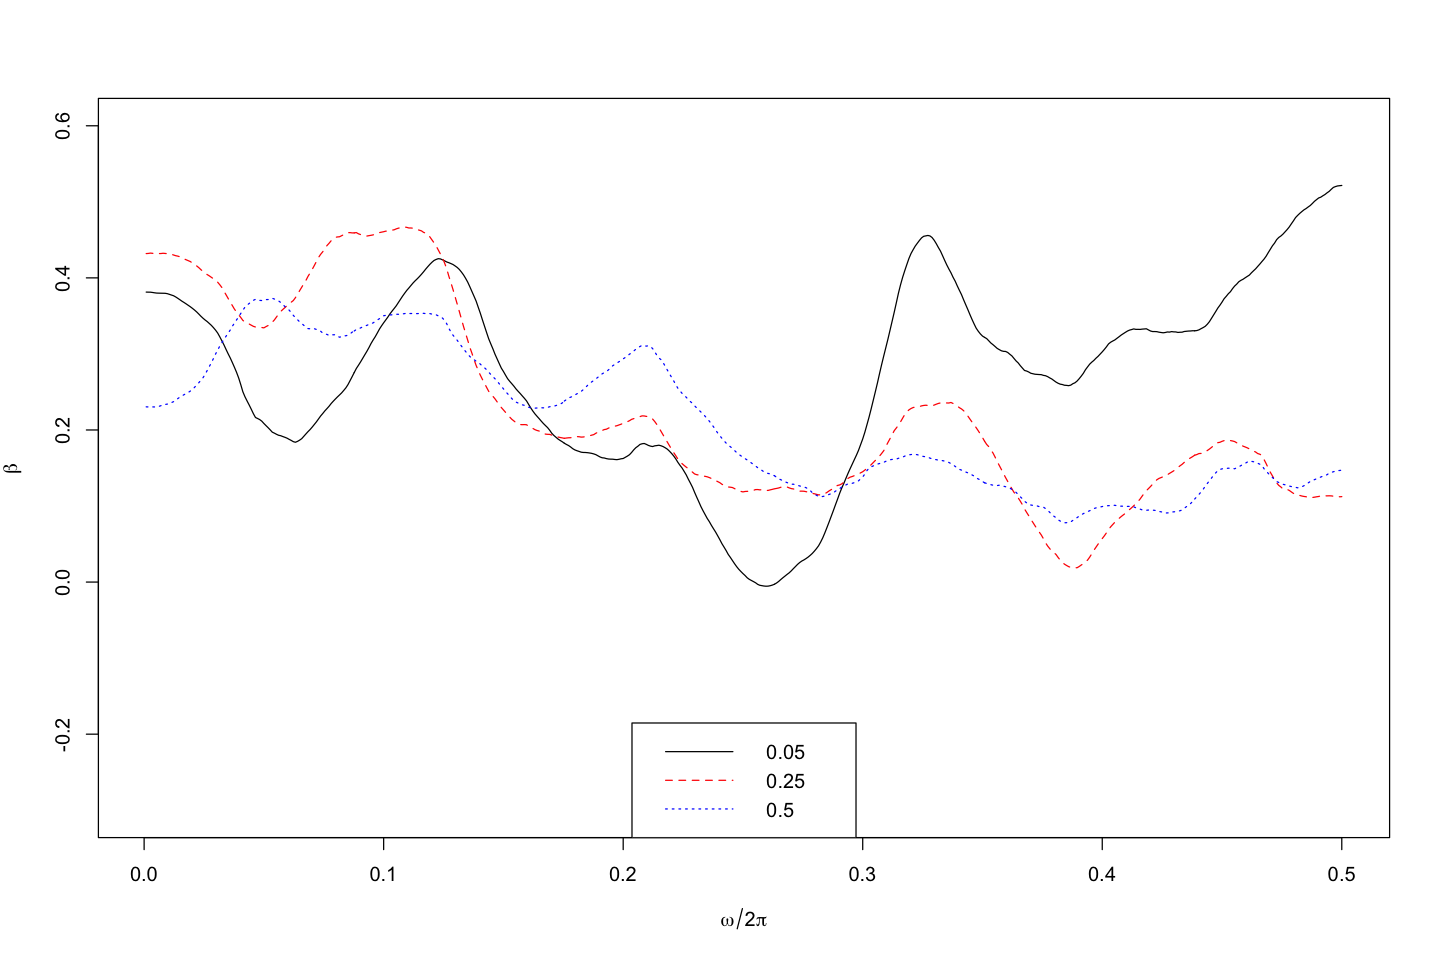

In [4]:
le <- dim(Y)[1]
freqs_out <- 1:round(le / 2)
freqs <- (0:le)/(le+1)
freqs <- freqs[which(freqs != 0)][1:round(le/2)]

options(repr.plot.width=12, repr.plot.height=8)
par(mfrow=c(1,1))
plot(freqs, Re(Beta[freqs_out,1,1,2,1,1]), type = "l", ylab = expression(beta),
     ylim = c(-0.3, 0.6), xlab = expression(omega / 2 * pi), main = "")
lines(freqs, Re(Beta[freqs_out,1,2,2,2,1]), col = "red", lty = 2)
lines(freqs, Re(Beta[freqs_out,1,3,2,3,1]), col = "blue", lty = 3)
legend("bottom", legend=quantile, col=c("black", "red", "blue"), lty=1:3, bg = "white")

### Confidence intervals for the estimated QS betas

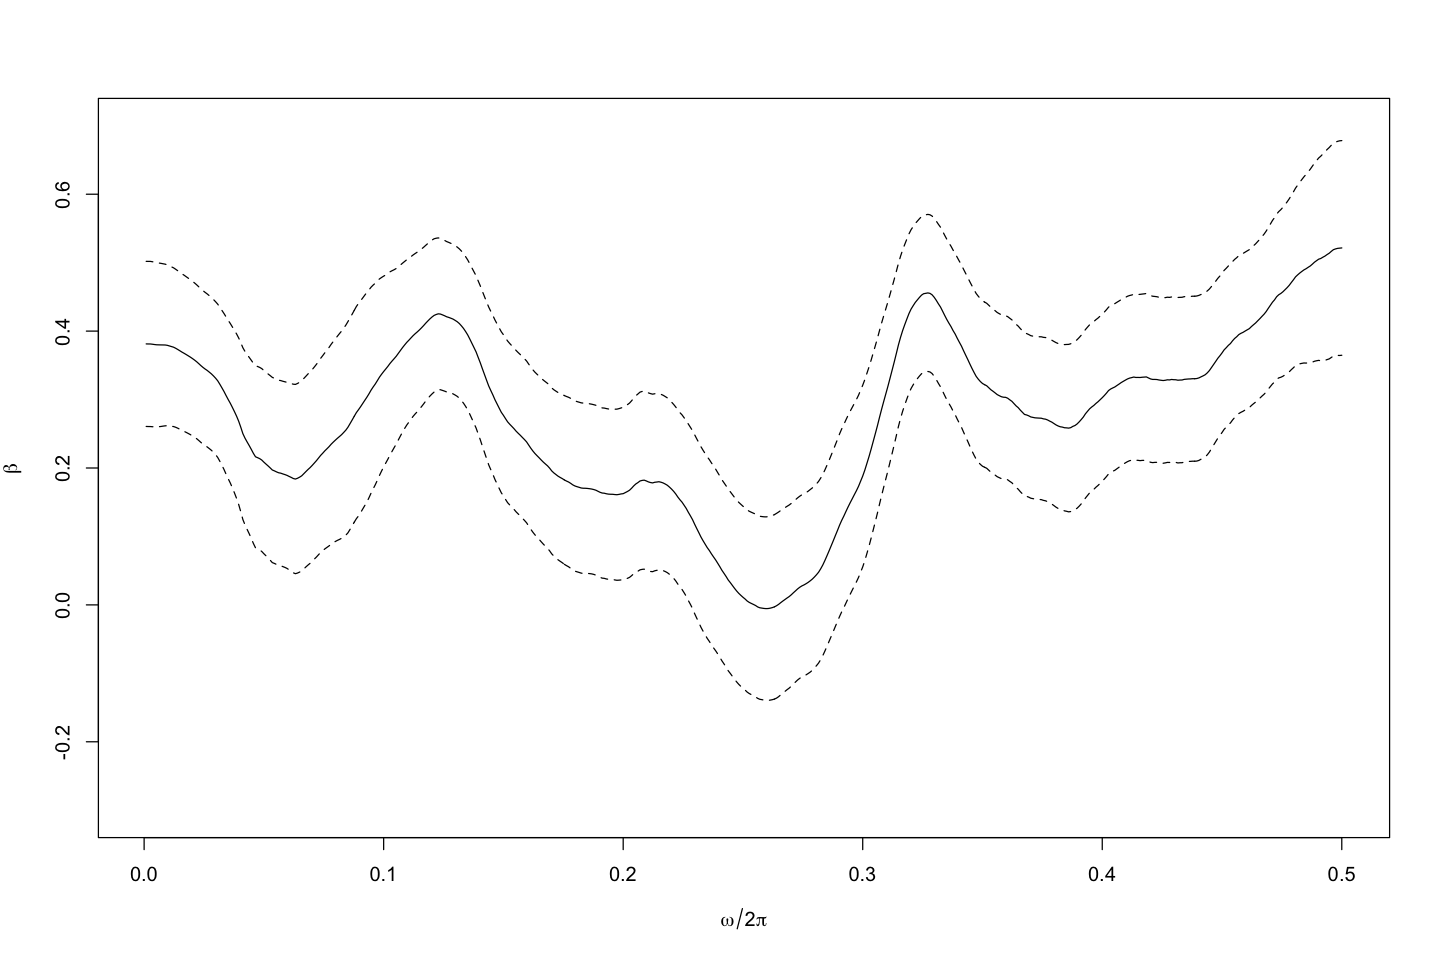

In [5]:
# 90% CI for QS betas where tau = 0.05
CI <- getPointwiseCIs(sPG, quantity = "beta")
plot(freqs, Re(Beta[freqs_out,1,1,2,1,1]), type = "l", main = "", ylab = expression(beta),
     ylim = c(-0.3, 0.7), xlab = expression(omega / 2 * pi))
lines(freqs, Re(CI$lowerCIs[freqs_out,1,1,2,1]), lty = 2)
lines(freqs, Re(CI$upperCIs[freqs_out,1,1,2,1]), lty = 2)

### TR and EVR risk measures
High-level implementation of the function $\texttt{getBeta}$ for asset pricing purposes.

In [6]:
tr <- unlist(compTrBeta(mkt, ff, tau1 = 0.05))
rel_tr <- unlist(compRelTrBeta(mkt, ff, tau1 = 0.05))
evr <- unlist(compEvrBeta(ff, mkt, tau1 = 0.05))

qs_betas <- cbind(tr, rel_tr, evr)
colnames(qs_betas) <- c("tr", "rel tr", "evr")
rownames(qs_betas) <- c("long", "short")

qs_betas

,tr,rel tr,evr
long,0.04801299,0.03131342,0.72294902
short,0.03975289,0.02305332,-0.04747626
